In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
print('Libraries Imported')

Libraries Imported


In [3]:
dataset = pd.read_excel('Features_2500RPM_15dB.xlsx')

In [13]:
X = dataset.iloc[:, :-14].values
y_14 = dataset.iloc[:,-1].values
y_4 = dataset.iloc[:,-2].values
y_OHE = y_4
X.shape

(3500, 85)

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_OHE = pd.get_dummies(y_OHE)
onehot = encoder.fit_transform(y_OHE)
print(y_OHE.shape)

(3500, 4)


In [23]:
from sklearn.model_selection import train_test_split
X_OHE_train, X_OHE_test, y_OHE_train, y_OHE_test = train_test_split(X, y_OHE, test_size = 0.2, random_state = 0)  
y_OHE_train.shape

(2800, 4)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_OHE_train = sc.fit_transform(X_OHE_train)
X_OHE_test = sc.transform(X_OHE_test)


### Constructing & Training KNN

In [39]:
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
classifier.fit(X_OHE_train, y_OHE_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = classifier.predict(X_OHE_test)

In [41]:
class_labels = list(y_OHE_test)
y_OHE_test = y_OHE_test.to_numpy()
type(y_OHE_test)

numpy.ndarray

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_OHE_test.argmax(axis=1), y_pred.argmax(axis=1))

In [43]:
cm

array([[272,  17,   0,   3],
       [ 16,  31,   0,   3],
       [  1,   2,  50,   0],
       [ 17,  20,   0, 268]])

In [44]:
accuracy_score(y_OHE_test, y_pred)

0.8714285714285714

In [45]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics

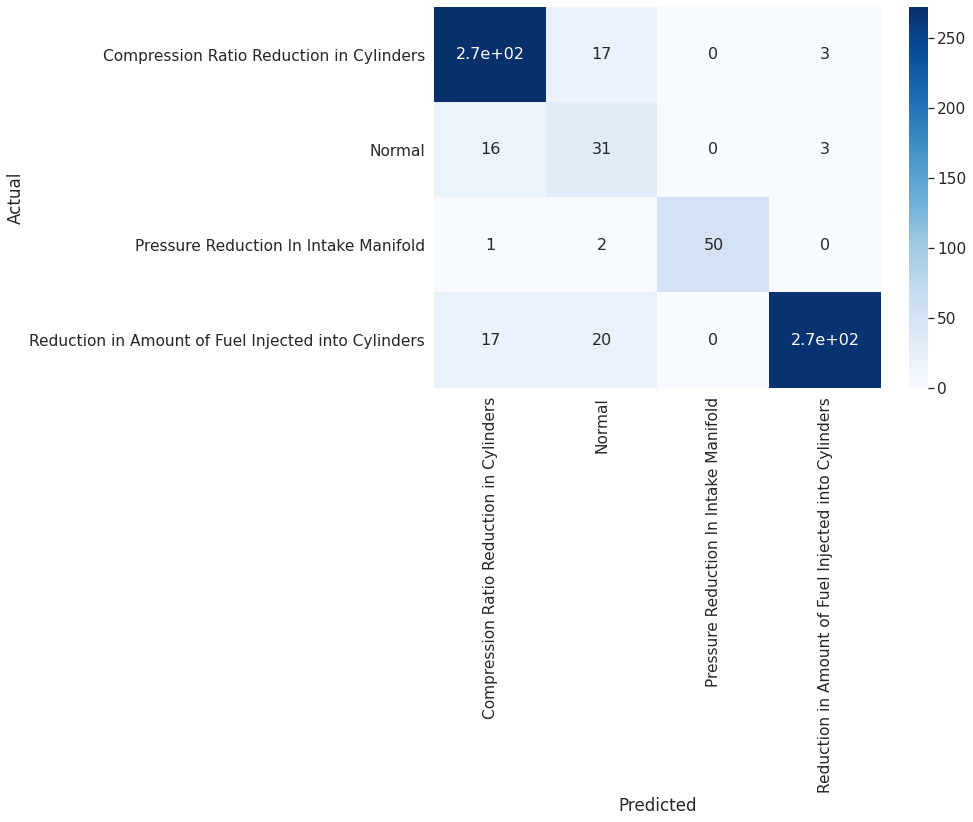

In [46]:
df_cm = pd.DataFrame(cm, columns=class_labels, index = class_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

### 14 Class Problem

In [47]:
y_OHE = y_14

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_OHE = pd.get_dummies(y_OHE)
onehot = encoder.fit_transform(y_OHE)
print(onehot)

[[1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]]


In [49]:
from sklearn.model_selection import train_test_split
X_OHE_train, X_OHE_test, y_OHE_train, y_OHE_test = train_test_split(X, y_OHE, test_size = 0.2, random_state = 0)  

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_OHE_train = sc.fit_transform(X_OHE_train)
X_OHE_test = sc.transform(X_OHE_test)


In [51]:
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
classifier.fit(X_OHE_train, y_OHE_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
y_pred = classifier.predict(X_OHE_test)

In [53]:
class_labels = list(y_OHE_test)
y_OHE_test = y_OHE_test.to_numpy()
type(y_OHE_test)

numpy.ndarray

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_OHE_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[63,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0],
       [ 2, 43,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0, 36,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0, 42,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 36,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 44,  3,  0,  0,  0,  0,  0,  0,  0],
       [19,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  2, 50,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  5,  0, 38,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  5,  0,  0, 30,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0, 50,  0,  0,  1],
       [ 4,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0, 51,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0, 38,  0],
       [ 9,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0, 43]])

In [55]:
accuracy_score(y_OHE_test, y_pred)

0.8442857142857143

In [56]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics

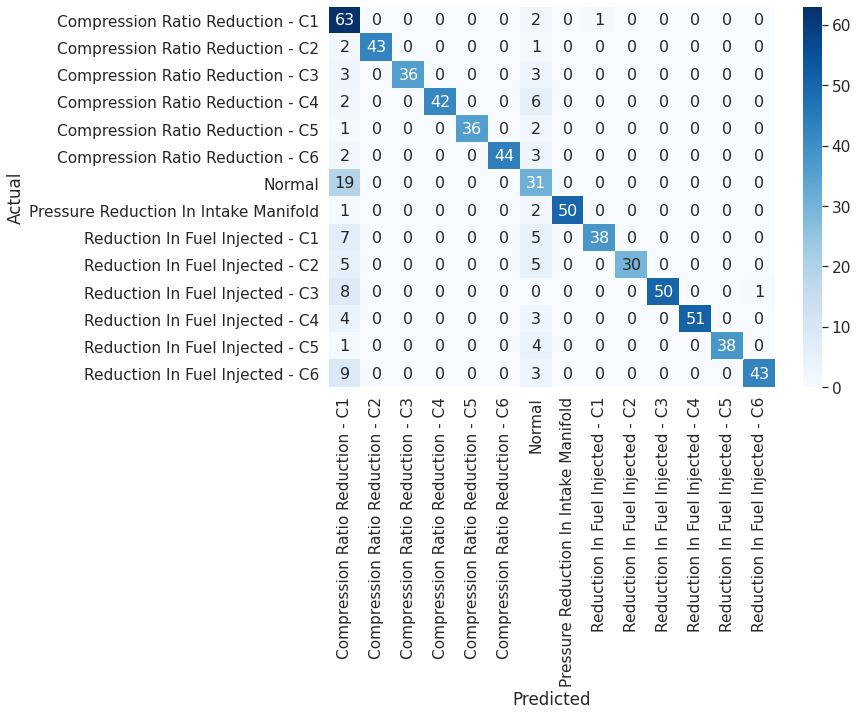

In [57]:
df_cm = pd.DataFrame(cm, columns=class_labels, index = class_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

### K-Fold CV

In [58]:
X_OHE = X

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_OHE = sc.fit_transform(X_OHE)

In [59]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_OHE, y_14):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 2800, Test set:700
Fold:2, Train set: 2800, Test set:700
Fold:3, Train set: 2800, Test set:700
Fold:4, Train set: 2800, Test set:700
Fold:5, Train set: 2800, Test set:700


5-Fold 14 Class

In [60]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2), X_OHE, y_14, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')


Scores for each fold are: [0.87       0.86571429 0.88428571 0.87285714 0.88      ]
Average score: 0.8746


5-Fold 4 Class

In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2), X_OHE, y_4, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')


Scores for each fold are: [0.89714286 0.87571429 0.87428571 0.88571429 0.86571429]
Average score: 0.8797
